In [451]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
mpl.rcParams['figure.dpi']= 120

__Crater Saturation__

Cummulative production CSFD of small _primary_ craters on the Moon as a simple power law ([Williams et al. (2014)](https://www.sciencedirect.com/science/article/pii/S001910351400133X)).

$N_{cr}(D_{cr},t)=cD_{cr}^{-b}t$ 

where $c = 1.467\times10^{-6}\text{ Ma}^{-1} \text{km}^{b-2}$ and $b=3.209$. Craters are saturated when the area covered by craters equals the unit area, including some efficiency factor related to crater overlap.

$N_{cr,sat}(D_{cr}) = \frac{A_{ref}}{e_fA_{cr}(D_{cr})}$

where $A_{cr}=\pi/4D_{cr}^2$ and $e_f=e^{-1}$. So the saturation crater diameter $D_{cr}$ at time t is:

$D_{cr,sat}(t) = \big(\frac{\pi}{4} e_f c t\big) ^ {\frac{1}{b-2}}$

__Cold Spot Saturation__

Cold spot saturation occurs sooner because a large region is influenced $D_{cs}=aD_{cr}^d$ where $a\approx50 \ \text{km}^{1-d}$ and $d\approx1$.

$D_{cs,sat}(t) = \big(\frac{\pi}{4} e_f a^2 c t\big) ^ {\frac{1}{b-2d}}$


These can be related to a saturation reworking depth by scaling for reworking. Bowl shaped craters have a depth to diameter ratio of 0.2 (at maximum depth) with a radially average depth ~0.1 of this: $z_{cr} = (0.2)(0.1)D_{cr}$. Cold spots have a maximum reworking depth to diameter ratio of ~2 m/km. Radially averaged out to the cold spot extent, reworking is about 0.37 of the maximum reworking depth: $z_{cs} = (0.37)(2\times10^{-3})D_{cr}$. We compare this to [Costello et al. (2018)](https://www.sciencedirect.com/science/article/abs/pii/S0019103517307066). If we assume the reworked density, this can also be written in terms of the mass (per unit area) of reworked material at depth $z$: $m_{z}/A=\rho z$.

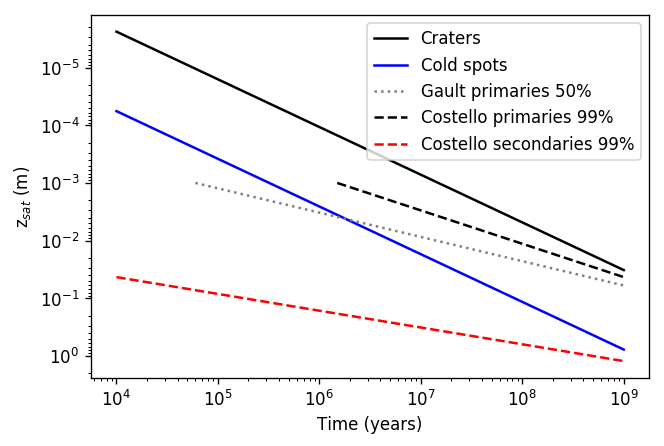

In [449]:
t = np.logspace(-2,3,100) # Ma

# crater saturation
b = 3.209
c = 1.467e-6 # Ma^-1 km^-2-b

ef = np.exp(-1)
kcrz = 0.2 * 0.1 # km/km max depth to diameter, radial average 
Dcr = (np.pi / 4 * ef * c * t) ** (1/(b-2))
zcr = zcr_scale * Dcr # km

# coldspot saturation
a = 50 # crater radii ^ -d
d = 1
Dcs = (np.pi / 4 * ef * a**2 * c * t) ** (1/(b-2*d))
kcsz = 0.37 * 2e-3 #km/km
zcs = kcsz * Dcs # km

plt.figure()
plt.loglog(t*10**6, zcr*10**3,'k')
plt.loglog(t*10**6, zcs*10**3, 'b')
plt.loglog(np.array([6e4, 1e9]),np.array([1e-3, 6e-2]),':',color=np.array([0.5, 0.5, 0.5]))
plt.loglog(np.array([1.5e6, 1e9]),np.array([1e-3, 4.3e-2]),'k--')
plt.loglog(np.array([1e4, 1e9]),np.array([4.3e-2, 1.23e-0]),'r--')

plt.xlabel('Time (years)')
plt.ylabel('z$_{sat}$ (m)')
plt.legend(['Craters','Cold spots',
            'Gault primaries 50%',
            'Costello primaries 99%',
            'Costello secondaries 99%'],loc=1)
plt.gca().invert_yaxis()

__Probability of Reworking__

A cold spot of some size will influence a circular region $D_{cs}/2$ in radius. Considering a point on the surface, any crater which forms less than $D_{cs}/2$ away will rework the regolith at that point. The number of reworking events at our point is the number of craters which form within distance $D_{cs}/2$:

$\bar N_{cs}(D_{cs},t)=N_{cr}(D_{cr},t)\cdot A_{cs}(D_{cr})=cD_{cr}^{-b}t\cdot \pi\big(\frac{aD_{cr}^d}{2}\big)^2=\frac{\pi}{4}ca^2D_{cr}^{-b+2d}t$

or 

$\frac{d\bar N}{dt}(D_{cr})=\frac{\pi}{4}ca^2D_{cr}^{-b+2d}$

$N_{cr}$ has units of number per area, so we use $\bar N$ to signify total number of events. This can be related to a depth of reworked material by a scaling: $z_{cs} = k_{cs}D_{cr}$. 

$\frac{d\bar N}{dt}(z_{cs})=\frac{\pi}{4}ca^2\big(\frac{z_{cs}}{k_{cs}}\big)^{-b+2d}$

This is also the probability of a reworking event at some depth. In our simplified cold spot model, if an event occurs (probability of 1), the density of the material will be reworked to some fixed loosely-packed density $p_0$. In this case, the rate of change in density depends on the density of the material and the frequency of events at a particular depth.

$\frac{d\rho}{dt}(z_{cs},\rho)\Big|_{cs}=\frac{d\bar N}{dt}(z_{cs})\cdot(\rho_0-\rho)$


__Regolith Compaction Rate__

A scaled exponential is commonly used to describe the compaction of granular systems ([Richard et al. (2005)](https://www.nature.com/articles/nmat1300)). In vertical tapping experiments, a column of spherical grains initially at some loosely-packed density $\rho_0$ relax to the random-close-packing density $\rho_f$ over time as:

$\rho (t)=\rho_f-(\rho_f-\rho_0)e^{-t/\tau}$

or

$\frac{d\rho}{dt}(\rho)\Big|_c=\frac{1}{\tau}(\rho_f-\rho)$

where $\tau$ is the compaction timescale. This timescale was found to depend upon the maximum upwards acceleration of the material during tapping events. The change in column density with time should not depend on the thickness of the regolith layer unless it is so thick that the acceleration is significantly damped (in which case overburden pressure would likely also become significant).

__Steady-stated regolith profile__

At steady-state the rate of density change from compaction and reworking is zero:

$\frac{d\rho}{dt}(\rho)\Big|_c+\frac{d\rho}{dt}(z_{cs},\rho)\Big|_{cs}=0$

$\frac{\pi}{4}ca^2\big(\frac{z_{cs}}{k_{cs}}\big)^{-b+2d}\cdot(\rho_0-\rho)=-\frac{1}{\tau}(\rho_f-\rho)$

Which gives the density profile with depth:

$z_{cs}(\rho)=\Big(\frac{4}{\pi c a^2 \tau}\frac{\rho-\rho_f}{\rho_0-\rho}\Big)^{\frac{-1}{b-2d}}k_{cs}$

or 

$\rho(z_{cs}) = \frac{K_1\rho_0 + K_2\rho_f}{K_1+K_2}$ where $K_1=\pi a^2 c \tau \big(\frac{z_{cs}}{k_{cs}}\big)^{2d}$ and $K_2 = 4\big(\frac{z_{cs}}{k_{cs}}\big)^{b}$

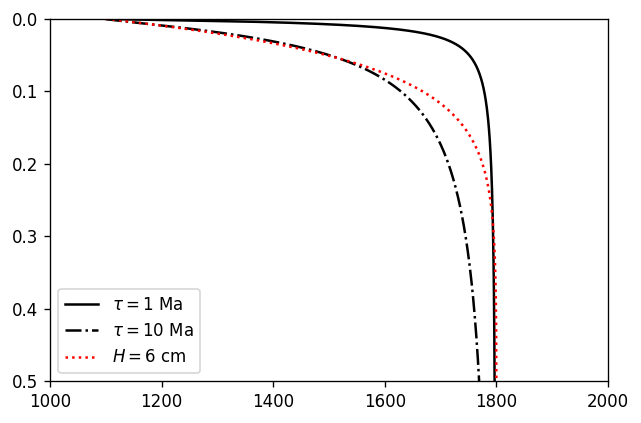

In [450]:
# steady state regolith profile
p0 = 1100 # kg m^-3
pf = 1800 
p = np.linspace(p0+1e-3,pf-1,1000)

# 1 Ma
tau = 1
z1 = (4 * (p-pf) / (np.pi*c* a**2 *tau) / (p0-p)) ** (-1/(b-2*d)) * kcsz * 1000

# 10 Ma
tau = 10
z10 = (4 * (p-pf) / (np.pi*c* a**2 *tau) / (p0-p)) ** (-1/(b-2*d)) * kcsz * 1000

# H-parameter
zH = np.linspace(0,1,1000)
pH = pf - (pf - p0) * np.exp(-zH/0.06)

plt.figure()
plt.plot(p, z1,'k')
plt.plot(p, z10,'k-.')
plt.plot(pH, zH,'r:')

plt.ylim(0,0.5)
plt.gca().legend([r'$\tau=1$ Ma',r'$\tau=10$ Ma',r'$H=6$ cm'])
#plt.legend([r'$tau $ Ma','a','a'])
plt.xlim(1000,2000)
plt.gca().invert_yaxis()